In [6]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('movie.csv')
df.head()


Saving movie.csv to movie.csv


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [9]:
df.shape

(39723, 2)

In [10]:
df.isnull().sum()

,0
text,0
label,0


In [11]:
df['label'].unique()

array([0, 1])

In [12]:
df['label'].value_counts()


,count
label,
1,19908
0,19815


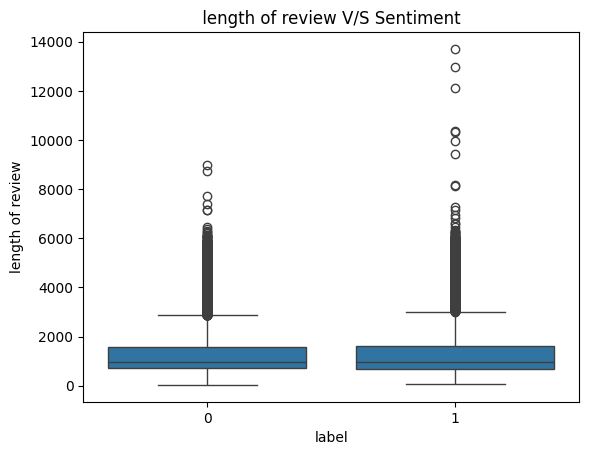

In [13]:
df['length of review'] = df['text'].apply(len)
sns.boxplot(x='label' , y='length of review' , data=df)
plt.title(' length of review V/S Sentiment ')
plt.show()

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
spwords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
import re

def remove(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]','',text)
  token = word_tokenize(text)
  filtered = [word for word in token if word not in spwords]
  return" ".join(filtered)

In [17]:
df['new_text']= df['text'].apply(remove)

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [21]:
def lemmatize_passage(text):
   words = word_tokenize(text)
   pos_tags= pos_tag(words)
   lemmatizer = WordNetLemmatizer()
   lemmatized_words = [lemmatizer.lemmatize(word , get_wordnet_pos(tag)) for word , tag in pos_tags]
   return ' '.join(lemmatized_words)



In [22]:
df['lemmatized_text'] = df['new_text'].apply(lemmatize_passage)


In [23]:
from sklearn.model_selection import train_test_split

x = df['lemmatized_text']
y = df['label']

x_train , x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state =42 )

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train_vec = tfidf.fit_transform(x_train)
x_test_vec = tfidf.transform(x_test)

Model(logistic regression)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


lgr = LogisticRegression()

lgr.fit(x_train_vec , y_train)
y_pred = lgr.predict(x_test_vec)


print("accuracy :" , accuracy_score(y_test , y_pred))

print("classication report", classification_report(y_test , y_pred))

print("confusion matrix: " ,confusion_matrix(y_test , y_pred))


accuracy : 0.8826935179358086
classication report               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3991
           1       0.87      0.90      0.88      3954

    accuracy                           0.88      7945
   macro avg       0.88      0.88      0.88      7945
weighted avg       0.88      0.88      0.88      7945

confusion matrix:  [[3472  519]
 [ 413 3541]]


Decision tree


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()

dt.fit(x_train_vec , y_train)

y_pred_dt = dt.predict(x_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7137822529893014
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      3991
           1       0.71      0.71      0.71      3954

    accuracy                           0.71      7945
   macro avg       0.71      0.71      0.71      7945
weighted avg       0.71      0.71      0.71      7945

Confusion Matrix:
 [[2856 1135]
 [1139 2815]]


Random forest


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier()

rf.fit(x_train_vec , y_train)

y_pred_rf= rf.predict(x_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8524858401510383

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      3991
           1       0.85      0.85      0.85      3954

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945


Confusion Matrix:
 [[3418  573]
 [ 599 3355]]


SVM

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = LinearSVC()

svm.fit(x_train_vec , y_train)

y_pred_svm = svm.predict(x_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.8843297671491505
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      3991
           1       0.88      0.89      0.88      3954

    accuracy                           0.88      7945
   macro avg       0.88      0.88      0.88      7945
weighted avg       0.88      0.88      0.88      7945

Confusion Matrix:
 [[3498  493]
 [ 426 3528]]


KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


knn = KNeighborsClassifier()


knn.fit(x_train_vec, y_train)


y_pred_knn = knn.predict(x_test_vec)


print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.7646318439269981

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75      3991
           1       0.73      0.83      0.78      3954

    accuracy                           0.76      7945
   macro avg       0.77      0.76      0.76      7945
weighted avg       0.77      0.76      0.76      7945


Confusion Matrix:
 [[2786 1205]
 [ 665 3289]]


Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


nb = MultinomialNB()
nb.fit(x_train_vec, y_train)


y_pred_nb = nb.predict(x_test_vec)


print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.8609188168659534

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      3991
           1       0.86      0.85      0.86      3954

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945


Confusion Matrix:
 [[3461  530]
 [ 575 3379]]


NN

In [34]:
pip install tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_vec.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train_vec, y_train, epochs=5, batch_size=32, validation_split=0.2,  callbacks=[early_stop])

Epoch 1/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 96s 119ms/step - accuracy: 0.8048 - loss: 0.4482 - val_accuracy: 0.8932 - val_loss: 0.2641
Epoch 2/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 147s 126ms/step - accuracy: 0.9662 - loss: 0.1052 - val_accuracy: 0.8779 - val_loss: 0.3084
Epoch 3/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 141s 125ms/step - accuracy: 0.9915 - loss: 0.0330 - val_accuracy: 0.8756 - val_loss: 0.4050
Epoch 4/5
795/795 ━━━━━━━━━━━━━━━━━━━━ 99s 124ms/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.8722 - val_loss: 0.5164


In [44]:
loss, accuracy = model.evaluate(x_test_vec, y_test)
print("Test Accuracy:", accuracy)

249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8734 - loss: 0.5192
Test Accuracy: 0.870736300945282
